In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

In [2]:
df = pd.read_csv("data.txt", sep=" ", header=None, dtype="float")
df_row, df_col = df.shape
data = np.array([[df[0][i] for i in range (df_row)], [df[1][i] for i in range (df_row)]])

In [3]:
random.seed(0)
init1 = random.randint(0,df_row)
init2 = random.randint(0,df_row)

In [4]:
centroid1 = np.array([df[0][init1], df[1][init1]])
centroid2 = np.array([df[0][init2], df[1][init2]])

In [5]:
print("Centroid1: ", centroid1)
print("Centroid2: ", centroid2)

Centroid1:  [8.70811 1.82278]
Centroid2:  [-5.71827 -6.33688]


In [6]:
#Euclidean distance
distance = np.array([[math.sqrt(((data[0][i] - centroid1[0]) * (data[0][i] - centroid1[0])) +
                                ((data[1][i] - centroid1[1]) * (data[1][i] - centroid1[1])))
                      for i in range(df_row)],

                     [math.sqrt(((data[0][i] - centroid2[0]) * (data[0][i] - centroid2[0])) +
                                ((data[1][i] - centroid2[1]) * (data[1][i] - centroid2[1])))
                      for i in range(df_row)]])


In [7]:
classify = np.array([[1 if distance[0][i] < distance[1][i] else 0 for i in range(df_row)],
                     [1 if distance[0][i] >= distance[1][i] else 0 for i in range(df_row)]])
classify_prev = classify.copy()


In [8]:
i = 0
print("Class1 points: ", np.count_nonzero(classify[0] == 1))
print("Class2 points: ", np.count_nonzero(classify[1] == 1))
print("Distance: ", distance)


Class1 points:  1000
Class2 points:  2000
Distance:  [[17.87797402 16.04047107 17.18624181 ...  2.79293986 17.92015853
  16.43751391]
 [ 2.60786948  1.09545794  1.08663347 ... 13.99536955  3.43402769
   0.34314601]]


In [9]:
while(True):
    class1 = np.array([[data[0][i] for i in range(df_row) if classify[0][i] == 1],
                       [data[1][i] for i in range(df_row) if classify[0][i] == 1]])

    class2 = np.array([[data[0][i] for i in range(df_row) if classify[1][i] == 1],
                       [data[1][i] for i in range(df_row) if classify[1][i] == 1]])

    centroid1 = np.array([np.mean(class1[0]), np.mean(class1[1])])
    centroid2 = np.array([np.mean(class2[0]), np.mean(class2[1])])

    print("New Centroid1: ", centroid1)
    print("New Centroid2: ", centroid1)

    #Euclidean distance
    distance = np.array([[math.sqrt(((data[0][i] - centroid1[0]) * (data[0][i] - centroid1[0])) +
                                    ((data[1][i] - centroid1[1]) * (data[1][i] - centroid1[1])))
                          for i in range(df_row)],

                         [math.sqrt(((data[0][i] - centroid2[0]) * (data[0][i] - centroid2[0])) +
                                    ((data[1][i] - centroid2[1]) * (data[1][i] - centroid2[1])))
                          for i in range(df_row)]])

    classify = np.array([[1 if distance[0][i] < distance[1][i] else 0 for i in range(df_row)],
                         [1 if distance[0][i] >= distance[1][i] else 0 for i in range(df_row)]])

    print("New Class1 points: ", np.count_nonzero(classify[0] == 1))
    print("New Class2 points: ", np.count_nonzero(classify[1] == 1))
    print("New Distance: ", distance)

    if np.array_equal(classify, classify_prev):
        break
    classify_prev = classify.copy()


New Centroid1:  [7.21831715 0.78213112]
New Centroid2:  [7.21831715 0.78213112]
New Class1 points:  1000
New Class2 points:  2000
New Distance:  [[16.11220126 14.22456153 15.39123732 ...  1.14350455 16.18066516
  14.63352344]
 [ 1.35762774  2.35516576  0.1758458  ... 14.7586032   2.22871542
   1.10073685]]


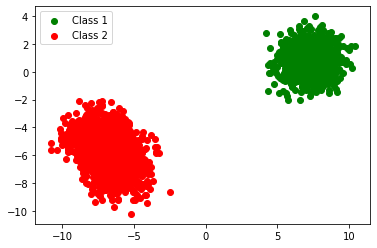

In [10]:
plt.scatter(class1[0], class1[1], color='green', label='Class 1', marker='o')
plt.scatter(class2[0], class2[1], color='red', label='Class 2', marker='o')
plt.legend(loc='upper left')
plt.show()
